<a href="https://colab.research.google.com/github/Bereket2017issack/The-Bootstrap-and-the-Normal-Curve/blob/master/Restaurant_inspection_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import all the necessary libraries to create tables 

In [0]:
# link to the dataset "https://raw.githubusercontent.com/data-8/data8assets/gh-pages/materials/fa16/hw/hw09/restaurant_inspection_scores.csv"

# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw09.ok')
_ = ok.auth(inline=True)



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [0]:
# Just run this cell.
pop_restaurants = Table.read_table('https://raw.githubusercontent.com/data-8/data8assets/gh-pages/materials/fa16/hw/hw09/restaurant_inspection_scores.csv')
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652",2803436,Routine Inspection
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660",10874330,Routine Inspection
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660",10874330,Routine Inspection
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660",10874330,Routine Inspection
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660",10874330,Routine Inspection


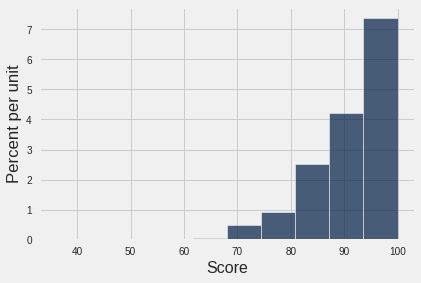

In [0]:
pop_restaurants.hist("Score", ec='w')

In [4]:
# Population mean 
pop_mean = np.mean(pop_restaurants.column(3))
pop_mean

91.40706693478886

Often it is impossible to find complete datasets like this.  Imagine we instead had access only to a random sample of 100 restaurant inspections, called `restaurant_sample`.  That table is created below. We are interested in using this sample to estimate the population mean.

In [5]:
restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
Changos,78705,06/25/2014,92,"3023 GUADALUPE ST AUSTIN, TX 78705 (30.29717, -97.741673)",2801137,1st Follow Up to Routine of 50 - 69
Target Store #96,78704,01/12/2015,89,"2300 W BEN WHITE BLVD WB AUSTIN, TX 78704 (30.232159, -9 ...",2800638,Routine Inspection
Heritage of Gaines Ranch- Assist Living,78735,02/23/2015,97,"4409 GAINES RANCH LOOP AUSTIN, TX 78735 (30.241887, -97. ...",2801297,Routine Inspection
Which Wich,78701,10/09/2015,64,"259 W 3RD ST AUSTIN, TX 78701 (30.265882, -97.746071)",10976306,Routine Inspection
Austin's Pizza,78705,09/18/2015,97,"2324 GUADALUPE ST AUSTIN, TX 78705 (30.286939, -97.741674)",2802926,Routine Inspection
"VV - AC VIP Marina, LLC",78641,04/04/2014,100,"16107 FM 2769 #B VOLENTE, TX 78641 (30.441639, -97.91229)",10406162,Routine Inspection
El Sapo Botanas Y Burgers,78722,09/18/2015,78,"1900 MANOR RD AUSTIN, TX 78722 (30.283868, -97.721726)",10678699,Routine Inspection
LW - Sonic,78734,05/21/2014,82,"2102 S FM 620 RD LAKEWAY, TX 78734 (30.343014, -97.967109)",2800793,Routine Inspection
Longhorn Village - Formal Dining,78732,10/22/2015,92,"12501 LONGHORN PKWY AUSTIN, TX 78732 (30.351175, -97.909237)",10260609,Routine Inspection
"Verts Mediterranean Grill, Inc.",78704,03/07/2016,96,"1500 S LAMAR BLVD AUSTIN, TX 78704 (30.252147, -97.7643)",10912346,Routine Inspection


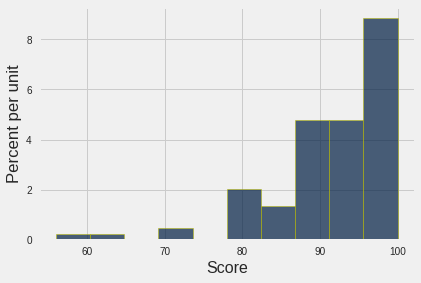

In [6]:
# Plotting histogram of scores
restaurant_sample.hist("Score", ec='y')

In [7]:
#Sample mean
sample_mean = np.mean(restaurant_sample.column(3))
sample_mean

91.8


Complete the function `bootstrap_scores` below. It should take no arguments. It should simulate drawing 5000 resamples from `restaurant_sample` and computing the mean restaurant score in each resample.  It should return an array of those 5000 resample means.

In [8]:
def bootstrap_scores():
    resampled_means = make_array()
    for i in range(5000):
        resampled_mean = np.mean(restaurant_sample.sample().column(3))
        resampled_means = np.append(resampled_means, resampled_mean)
    return resampled_means
    #resampled_means = Table().with_column('resampleed_means', resampled_means)


resampled_means = bootstrap_scores()
resampled_means

array([91.63, 90.98, 92.47, ..., 91.53, 90.97, 91.6 ])

Take a look at the histogram of the **resampled means**.

In [9]:
table_resample = Table().with_column('Resampled Means', resampled_means)
table_resample



Resampled Means
91.63
90.98
92.47
91.14
92.09
91.05
92.95
91.32
91.64
91.72


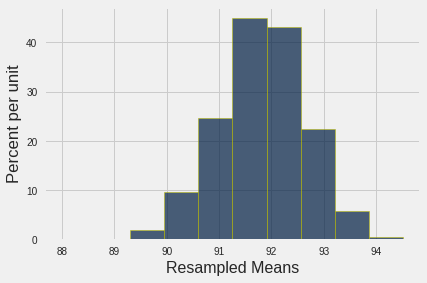

In [10]:
table_resample.hist(ec = 'y')

In [11]:
#Compute a 95 percent confidence interval for the average restaurant score using the array resampled_means.

lower_bound =  percentile(2.5, resampled_means)
upper_bound = percentile(97.5, resampled_means)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 90.12 , 93.38 )



Without referencing the array `resampled_means` or performing any new simulations, calculate an interval around the `sample_mean` that covers approximately 95% of the numbers in the `resampled_means` array.  **You may use the following values to compute your result, but you should not perform additional resampling** - think about how you can use the CLT to accomplish this.

In [12]:
sample_mean = np.mean(restaurant_sample.column(3))
sample_sd = np.std(restaurant_sample.column(3))
sample_size = restaurant_sample.num_rows

lower_bound_normal = sample_mean - 2*(np.std(restaurant_sample.column(3)))
upper_bound_normal = sample_mean + 2*(np.std(restaurant_sample.column(3)))
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation:
( 75.49049356969991 , 108.10950643030009 )
